In [1]:
%%capture
from datetime import datetime
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
plt.rcParams.update({"font.size": 12})
%matplotlib inline

In [12]:
def plot_temporal_topic(df,topic_number,sub):
    df['Timestamp']=df['Timestamp'].astype('datetime64[ns]')
    df[df['Topic'] == topic_number].plot(figsize=(10,7),
                                         kind='scatter',
                                         x='Timestamp',
                                         y='Frequency',                                         
                                         title =sub+ '- Topic: '+str(topic_number),rot=45)

In [4]:
from ast import literal_eval
#dc = literal_eval(dc)
## Function to get common topics across all subreddits
def get_common_topics(topics1,topics2,topics3={}, common_words_nr= 5):
  # get list of words for each topic 
  # intersect operation on list of words of two topics
  # if intersection has atlest n common words : topic is same
  # add it to list of common topics : dictionary - {topic1: [word1,word2], topic2: [word1,word2] }
  #topics1 = literal_eval(topics1)
  #topics2 = literal_eval(topics2)
  common_topics = {}
  count = 0
  print('Topics in 1:'+ str(len(topics1.items())))
  print('Topics in 2:'+ str(len(topics2.items())))
  skip = False
  if topics3:
      #topics3 = literal_eval(topics3)
      print('Topics in 3:'+ str(len(topics3.items())))
  for topic,word_lst1 in topics1.items():
    skip = False
    topic_words = list(map(lambda x: x[0], word_lst1))
    #print(topic)
   
    for topic2,word_lst2 in topics2.items():
      if skip:
        break
      topic2_words =  list(map(lambda x: x[0], word_lst2))
      #print(topic2_words)
      if topics3:        
        for topic3,word_lst3 in topics3.items():
          topic3_words =  list(map(lambda x: x[0], word_lst3))
          common_words = set(topic_words) & set(topic2_words) & set(topic3_words)
          if (len(list(common_words)) >= common_words_nr): #or (len(list(common_words)) > common_words_nr-1) or (len(list(common_words)) > common_words_nr-2):
              print(topic,"_",topic2,"_",topic3,"_",common_words)
              #plot_temporal_topic(wsb_topics_overtime,topic,"WSB")
              #plot_temporal_topic(stocks_topics_overtime,topic2,"Stocks")
              #plot_temporal_topic(investing_topics_overtime,topic3,"Investing")
              count = count + 1
              common_topics['total'] = count 
              common_topics[topic]= topic_words
              #common_topics[topic]= word_lst1
              skip = True
              break
              
          
      else:
        common_words = set(topic_words) & set(topic2_words)
        #print(list(common_words))
        #print(len(list(common_words)))
        
        if len(list(common_words)) > common_words_nr:
              print(common_words)
              count = count + 1
              common_topics['total'] = count 
              common_topics[topic]= topic_words
              #common_topics[topic]= word_lst1
              break
             
  return common_topics

In [5]:
wsb_topics_overtime = pd.read_csv("data/topics_over_time_wsb.csv",sep=';')
stocks_topics_overtime = pd.read_csv("data/topics_over_time_stocks.csv",sep=';')
investing_topics_overtime = pd.read_csv("data/topics_over_time_investing.csv",sep=';')

In [6]:
import json
with open('data/topics_investing.json', 'r') as fp:
        topics_investing= json.load(fp)
        
with open('data/topics_wsb.json', 'r') as fp:
        topics_wsb= json.load(fp)
        
with open('data/topics_stocks.json', 'r') as fp:
        topics_stocks= json.load(fp)

In [7]:
dict(list(topics_wsb.items())[1533:1535])

{'1532': [['russell', 0.16838985345971777],
  ['additions', 0.050570108416025154],
  ['reconstitution', 0.04581403278899719],
  ['microcap', 0.03141968925967537],
  ['3000', 0.026766209330590065],
  ['2000', 0.02396136726213647],
  ['index', 0.02315883155118588],
  ['pdf', 0.022450704495063842],
  ['sheets', 0.02094645950645025],
  ['sma', 0.01884131023823058]],
 '1533': [['apha', 0.11737633205852213],
  ['aphatlry', 0.0897191475451195],
  ['tlry', 0.07027462505986337],
  ['arbitrage', 0.05898201091676478],
  ['merger', 0.05391153464921163],
  ['tlryapha', 0.039613251592553037],
  ['cardiac', 0.027883682260444284],
  ['arrest', 0.021198318063468266],
  ['potstocks', 0.02044378577036399],
  ['supportive', 0.019806625796276518]]}

In [15]:
get_common_topics(dict(list(topics_wsb.items())[1533:]),topics_stocks,topics_investing,6)

Topics in 1:1586
Topics in 2:1308
Topics in 3:1406
1533 _ 451 _ 1317 _ {'apha', 'merger', 'arbitrage', 'tlry', 'aphatlry', 'tlryapha'}
3046 _ 381 _ 346 _ {'brokerages', 'transfer', 'transferring', 'brokers', 'brokerage', 'switching'}


{'total': 2,
 '1533': ['apha',
  'aphatlry',
  'tlry',
  'arbitrage',
  'merger',
  'tlryapha',
  'cardiac',
  'arrest',
  'potstocks',
  'supportive'],
 '3046': ['transfer',
  'partes',
  'transferring',
  'accts',
  'switching',
  'investopedia',
  'saxo',
  'brokers',
  'brokerages',
  'brokerage']}

In [ ]:
get_common_topics(dict(list(topics_wsb.items())[1533:]),topics_stocks,topics_investing,5)

Topics in 1:1586
Topics in 2:1308
Topics in 3:1406
1533 _ 451 _ 1317 _ {'merger', 'apha', 'tlry', 'arbitrage', 'tlryapha', 'aphatlry'}
1654 _ 304 _ 587 _ {'cd', 'projekt', 'otgly', 'project', 'red'}
1682 _ 301 _ 522 _ {'jassy', 'stepping', 'ceo', 'jeff', 'bezos'}
1940 _ 304 _ 587 _ {'cd', '2077', 'projekt', 'otgly', 'cyberpunk'}


15 _ 107 _ 39 _ {'hedgefunds', 'managers', 'hedge', 'fund', 'hedgefund', 'funds'}
243 _ 134 _ 307 _ {'tok', 'bytedance', 'tiktok', 'tiktoks', 'microsoft', 'tik'}
1533 _ 451 _ 1317 _ {'apha', 'arbitrage', 'tlryapha', 'tlry', 'merger', 'aphatlry'}


-----------------------------------------------------------------

1533 _ 451 _ 1317 _ {'apha', 'merger', 'arbitrage', 'tlry', 'aphatlry', 'tlryapha'}
3046 _ 381 _ 346 _ {'brokerages', 'transfer', 'transferring', 'brokers', 'brokerage', 'switching'}

In [31]:
investing_topics_overtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  16512 non-null  int64         
 1   Topic       16512 non-null  int64         
 2   Words       16512 non-null  object        
 3   Frequency   16512 non-null  int64         
 4   Timestamp   16512 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 645.1+ KB


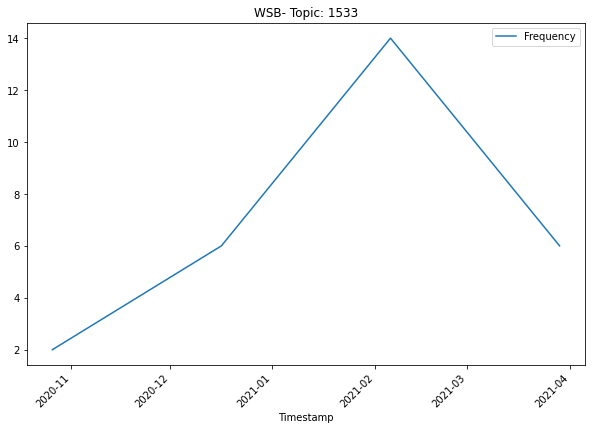

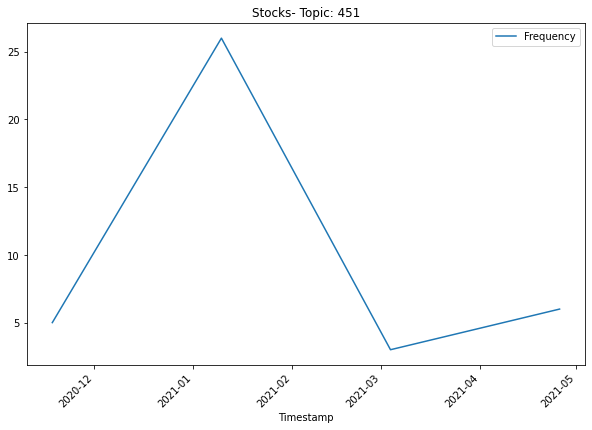

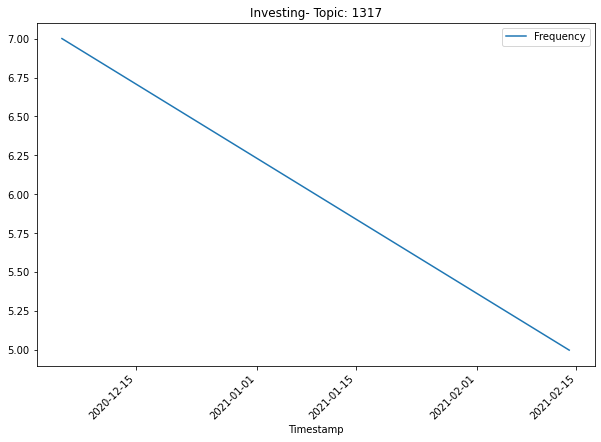

In [16]:
#25 _ 296 _ 21 _ {'corona', 'outbreak', 'death', 'coronavirus', 'virus'}
#1533 _ 451 _ 1317 _ {'apha', 'merger', 'arbitrage', 'tlry', 'aphatlry', 'tlryapha'}
plot_temporal_topic(wsb_topics_overtime,1533,"WSB")
plot_temporal_topic(stocks_topics_overtime,451,"Stocks")
plot_temporal_topic(investing_topics_overtime,1317,"Investing")

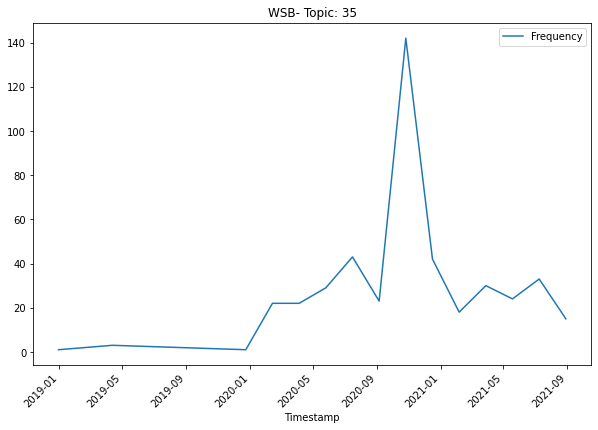

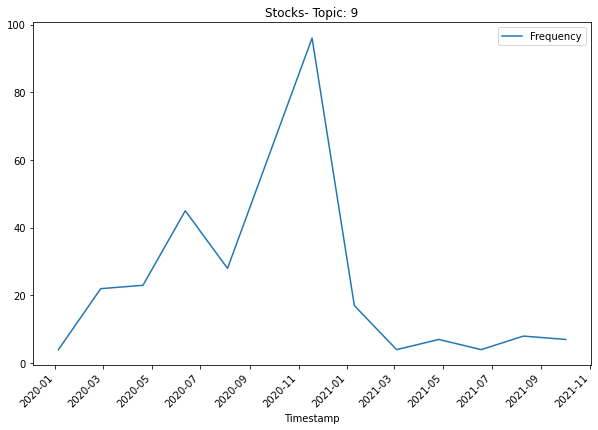

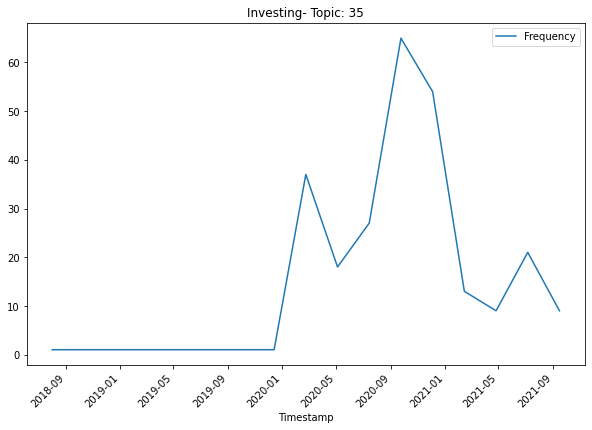

In [24]:
#35 _ 9 _ 35 _ {'covid19', 'vaccine', 'vaccines', 'pfizer', 'covid'}
plot_temporal_topic(wsb_topics_overtime,35,"WSB")
plot_temporal_topic(stocks_topics_overtime,9,"Stocks")
plot_temporal_topic(investing_topics_overtime,35,"Investing")

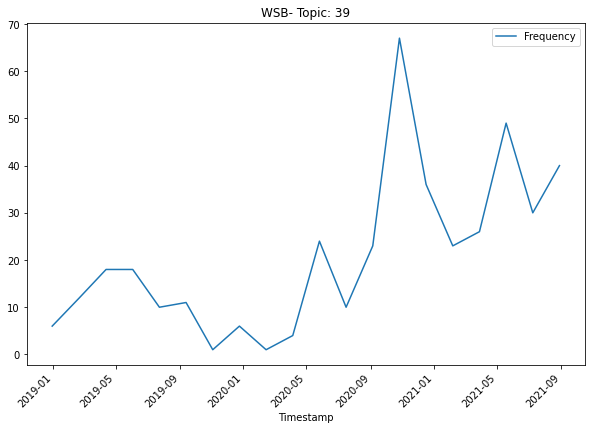

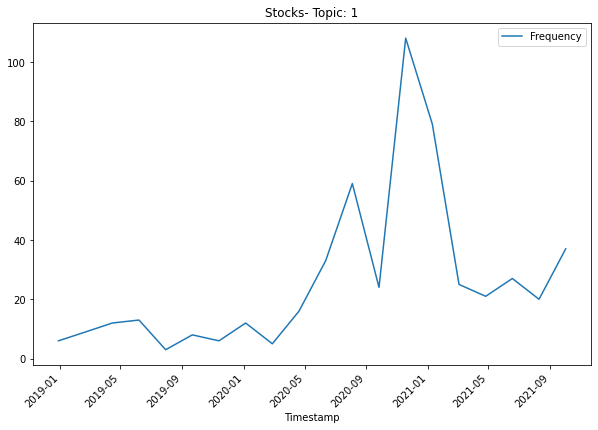

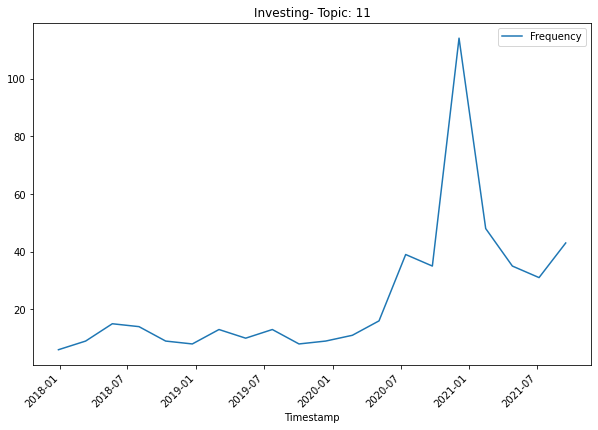

In [25]:
#39 _ 1 _ 11 _ {'ipos', 'preipo', 'ipo', 'bumble', 'upcoming'}
plot_temporal_topic(wsb_topics_overtime,39,"WSB")
plot_temporal_topic(stocks_topics_overtime,1,"Stocks")
plot_temporal_topic(investing_topics_overtime,11,"Investing")

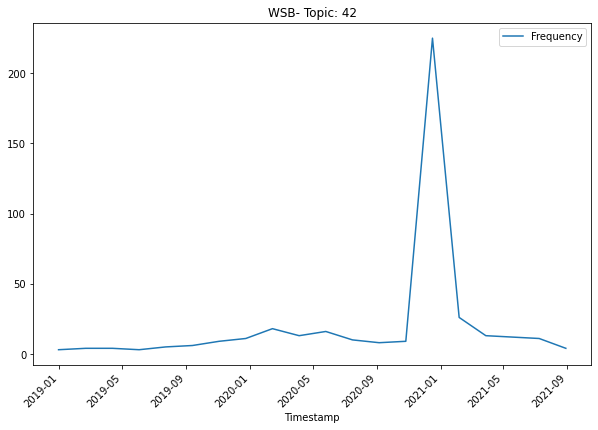

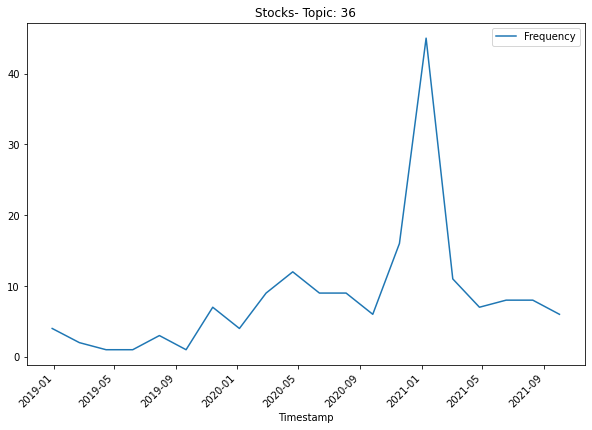

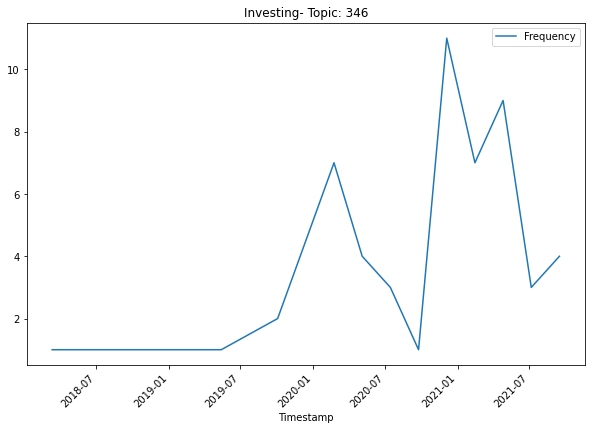

In [33]:
#42 _ 36 _ 346 _ {'switch', 'brokers', 'broker', 'brokerages', 'brokerage'}
plot_temporal_topic(wsb_topics_overtime,42,"WSB")
plot_temporal_topic(stocks_topics_overtime,36,"Stocks")
plot_temporal_topic(investing_topics_overtime,346,"Investing")

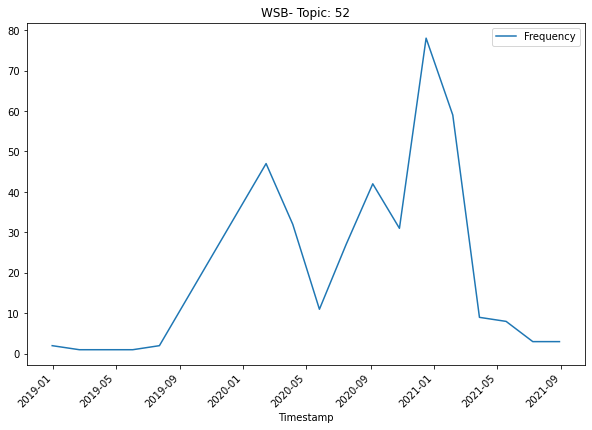

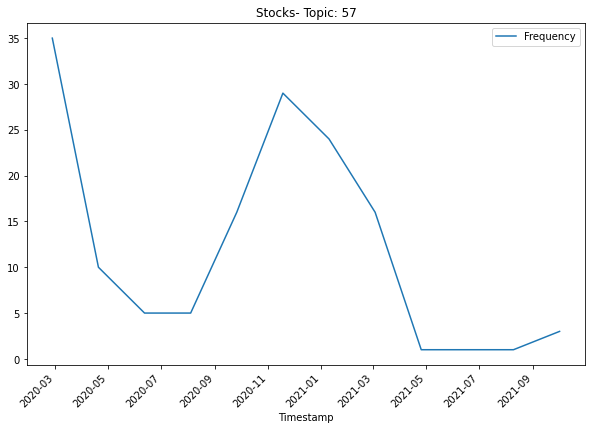

In [34]:
#52 _ 57 _ 59 _ {'stimulus', 'package', 'check', 'checks', 'bill'}
plot_temporal_topic(wsb_topics_overtime,52,"WSB")
plot_temporal_topic(stocks_topics_overtime,57,"Stocks")
#plot_temporal_topic(investing_topics_overtime,59,"Investing")

In [35]:
investing_topics_overtime[investing_topics_overtime['Topic']==59]#2020-02-23 -2

,Unnamed: 0,Topic,Words,Frequency,Timestamp
4802,4802,59,"fresh, stimulus, wave, economic, position",1,2019-07-23 21:14:19.800
5348,5348,59,"rescuing, stimulus, keeps, again, fed",1,2019-10-03 06:33:08.900
6055,6055,59,"restarted, denials, stimulus, rbc, emergency",1,2019-12-13 15:51:58.000
6883,6883,59,"stimulus, package, checks, bill, packages",76,2020-02-23 01:10:47.100
7951,7951,59,"stimulus, check, 1200, package, unwinding",13,2020-05-04 10:29:36.200
8983,8983,59,"stimulus, checks, round, 2nd, 1200",13,2020-07-14 19:48:25.300
10031,10031,59,"stimulus, negotiating, package, white, election",26,2020-09-24 05:07:14.400
11087,11087,59,"stimulus, checks, package, 19t, rescue",29,2020-12-04 14:26:03.500
12368,12368,59,"stimulus, checks, payments, americans, permanent",18,2021-02-13 23:44:52.600
13469,13469,59,"bailing, swaps, mortgages, stimulus, wouldnt",1,2021-04-26 09:03:41.700


In [36]:
wsb_topics_overtime[wsb_topics_overtime['Topic']==52] #2020-02-13 - 1

,Unnamed: 0,Topic,Words,Frequency,Timestamp
40,40,52,"tariff, donald, stimulus, discuss, man",2,2018-12-30 13:56:57.100999936
924,924,52,"reverses, ecb, measures, stimulus, course",1,2019-02-20 17:53:54.950000128
1648,1648,52,"fiscal, effect, stimulus, economy, lose",1,2019-04-12 21:17:59.900000000
2430,2430,52,"distress, disposal, stimulus, williams, referring",1,2019-06-03 00:42:04.849999872
3078,3078,52,"stimulus, neu, migrant, hispanic, cumulative",2,2019-07-24 04:06:09.800000000
6171,6171,52,"stimulus, package, bill, checks, trillion",47,2020-02-13 17:42:29.600000000
7555,7555,52,"stimulus, checks, package, check, 1200",32,2020-04-04 21:06:34.550000128
9046,9046,52,"stimulus, checks, boe, check, hazard",11,2020-05-26 00:30:39.500000000
10298,10298,52,"stimulus, package, checks, nfp, reactions",27,2020-07-16 03:54:44.449999872
11688,11688,52,"stimulus, pelosi, package, unlikely, trillion",42,2020-09-05 07:18:49.400000000


In [37]:
stocks_topics_overtime[stocks_topics_overtime['Topic']==57] #2020-02-26 -3

,Unnamed: 0,Topic,Words,Frequency,Timestamp,Name
3487,3487,57,"stimulus, package, checks, bill, trillion",35,2020-02-26 23:07:33.800000000,57_stimulus_checks_package_bill
4364,4364,57,"stimulus, dependents, penneys, bounced, 1200",10,2020-04-19 22:57:41.649999872,57_stimulus_checks_package_bill
5348,5348,57,"stimulus, newly, checks, 1200, package",5,2020-06-11 22:47:49.500000000,57_stimulus_checks_package_bill
6360,6360,57,"stimulus, stalled, negotiations, checks, package",5,2020-08-03 22:37:57.350000128,57_stimulus_checks_package_bill
7359,7359,57,"stimulus, package, pelosi, checks, bill",16,2020-09-25 22:28:05.200000000,57_stimulus_checks_package_bill
8285,8285,57,"stimulus, checks, package, 600, 2000person",29,2020-11-17 22:18:13.049999872,57_stimulus_checks_package_bill
9379,9379,57,"stimulus, checks, trillion, check, biden",24,2021-01-09 22:08:20.900000000,57_stimulus_checks_package_bill
10512,10512,57,"stimulus, checks, bill, vioo, finalize",16,2021-03-03 21:58:28.750000128,57_stimulus_checks_package_bill
11405,11405,57,"budget, include, bidens, spending, decade",1,2021-04-25 21:48:36.600000000,57_stimulus_checks_package_bill
13103,13103,57,"5000000, griffin, ken, donates, governor",1,2021-08-09 21:28:52.300000000,57_stimulus_checks_package_bill


In [39]:
#39 _ 1 _ 11 _ {'ipos', 'preipo', 'ipo', 'bumble', 'upcoming'}
from IPython.display import display
display(wsb_topics_overtime[wsb_topics_overtime['Topic']==39]) #2021-02-05, wework:2019-04-12 
display(stocks_topics_overtime[stocks_topics_overtime['Topic']==1]) #2021-01-09, wework: 2019-07-29
display(investing_topics_overtime[investing_topics_overtime['Topic']==11]) #2020-12-04, wework: 2019-07-23  [1.WSB, 2.investing, 3.Stocks]

,Unnamed: 0,Topic,Words,Frequency,Timestamp
33,33,39,"icron, worx, ipo, aggregate, preipo",6,2018-12-30 13:56:57.100999936
915,915,39,"ipo, levi, amazonmercadolibre, tradeweb, prudent",12,2019-02-20 17:53:54.950000128
1639,1639,39,"ipo, wework, ipos, velveeta, pinterest",18,2019-04-12 21:17:59.900000000
2423,2423,39,"ipos, crowdstrike, ipo, cashes, preipo",18,2019-06-03 00:42:04.849999872
3070,3070,39,"wework, ipo, regus, rehash, ipos",10,2019-07-24 04:06:09.800000000
3794,3794,39,"wework, ipo, bilzerians, firming, shelving",11,2019-09-13 07:30:14.750000128
4420,4420,39,"bill, ipo, dd, ipos, wework",1,2019-11-03 10:54:19.700000000
5181,5181,39,"reyn, reynolds, ipos, bespoke, tranche",6,2019-12-24 14:18:24.649999872
6161,6161,39,"reddit, ipo, ipos, wework, preipo",1,2020-02-13 17:42:29.600000000
7543,7543,39,"palihapitiyas, ipos, ipo, owns, draftkings",4,2020-04-04 21:06:34.550000128


,Unnamed: 0,Topic,Words,Frequency,Timestamp,Name
2,2,1,"siteway, waymo, ipos, ipo, pre",6,2018-12-28 23:00:18.843000064,1_ipo_ipos_preipo_bumble
410,410,1,"ipos, 1517, ipgp, ipoed, 12b",9,2019-02-21 00:16:38.849999872,1_ipo_ipos_preipo_bumble
768,768,1,"preipo, ipo, ipos, exposes, citron",12,2019-04-15 00:06:46.700000000,1_ipo_ipos_preipo_bumble
1173,1173,1,"ipos, ipo, crowdstrike, 1919, ipocrowdsrike",13,2019-06-06 23:56:54.550000128,1_ipo_ipos_preipo_bumble
1537,1537,1,"weworks, scrapping, teamviewer, aramco, chief",3,2019-07-29 23:47:02.400000000,1_ipo_ipos_preipo_bumble
1908,1908,1,"ipos, preipo, pornhub, oppurtunities, 20192020",8,2019-09-20 23:37:10.249999872,1_ipo_ipos_preipo_bumble
2277,2277,1,"aramco, ipos, hesitant, ipo, saudi",6,2019-11-12 23:27:18.100000000,1_ipo_ipos_preipo_bumble
2764,2764,1,"casper, converted, ipo, topgolf, deac",12,2020-01-04 23:17:25.950000128,1_ipo_ipos_preipo_bumble
3434,3434,1,"backdoor, freak, hospital, ipo, preipo",5,2020-02-26 23:07:33.800000000,1_ipo_ipos_preipo_bumble
4309,4309,1,"ipo, ipos, preipo, novsu, pexip",16,2020-04-19 22:57:41.649999872,1_ipo_ipos_preipo_bumble


,Unnamed: 0,Topic,Words,Frequency,Timestamp
11,11,11,"ipo, ipos, dws, hadnt, involve",6,2017-12-28 08:27:48.417999872
585,585,11,"ipo, dropbox, 745m, 18share, volitile",9,2018-03-11 04:02:36.100000000
1106,1106,11,"ipo, ipos, elanco, yq, ipowhat",15,2018-05-21 13:21:25.200000000
1663,1663,11,"ipo, forgiving, wakefield, cushman, preipoprivate",14,2018-07-31 22:40:14.300000000
2237,2237,11,"ipo, ipos, magna, ipowhich, subpoenas",9,2018-10-11 07:59:03.400000000
2948,2948,11,"ipo, ipoed, lockup, ipos, dates",8,2018-12-21 17:17:52.500000000
3657,3657,11,"ipo, levis, ipos, denim, levi",13,2019-03-03 02:36:41.600000000
4172,4172,11,"ipo, chewy, ipos, petscom, footnote",10,2019-05-13 11:55:30.700000000
4759,4759,11,"ipo, wework, ipod, smile, ipos",13,2019-07-23 21:14:19.800000000
5306,5306,11,"ipo, postpaid, airtel, blaze, collaborate",8,2019-10-03 06:33:08.900000000


In [43]:
#42 _ 36 _ 346 _ {'switch', 'brokers', 'broker', 'brokerages', 'brokerage'}

display(wsb_topics_overtime[wsb_topics_overtime['Topic']==42] ]) #2021-02-05, wework:2019-04-12 
display(stocks_topics_overtime[stocks_topics_overtime['Topic']==36]) #2021-01-09, wework: 2019-07-29
display(investing_topics_overtime[investing_topics_overtime['Topic']==346]) #2020-12-04, wework: 2019-07-23  [1.WSB, 2.investing, 3.Stocks]

SyntaxError: invalid syntax (<ipython-input-43-c67d1702b7c6>, line 3)

In [28]:
display(wsb_topics_overtime[wsb_topics_overtime['Words'].isin(list({'switch', 'brokers', 'broker})) & wsb_topics_overtime['Topic']==42])

,Unnamed: 0,Topic,Words,Frequency,Timestamp


In [33]:
wsb_topics_overtime[wsb_topics_overtime['Topic']==42]['Words'].tolist()[0]

'54k, resolution, brokerage, broker, picking'

15 _ 107 _ 39 _ {'hedgefunds', 'managers', 'hedge', 'fund', 'hedgefund', 'funds'} 
243 _ 134 _ 307 _ {'tok', 'bytedance', 'tiktok', 'tiktoks', 'microsoft', 'tik'} 
1533 _ 451 _ 1317 _ {'apha', 'merger', 'arbitrage', 'tlry', 'aphatlry', 'tlryapha'}
1654 _ 304 _ 587 _ {'otgly', 'red', 'projekt', 'cd', 'project'}
1682 _ 301 _ 522 _ {'stepping', 'ceo', 'jassy', 'jeff', 'bezos'}
1940 _ 304 _ 587 _ {'otgly', 'cyberpunk', 'projekt', 'cd', '2077'}
2367 _ 106 _ 432 _ {'richard', 'galactic', 'branson', 'flight', 'virgin'}
3046 _ 381 _ 346 _ {'brokerages', 'transfer', 'transferring', 'brokers', 'brokerage', 'switching'}



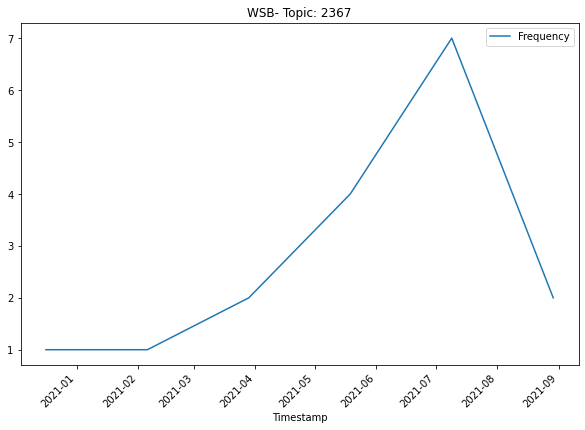

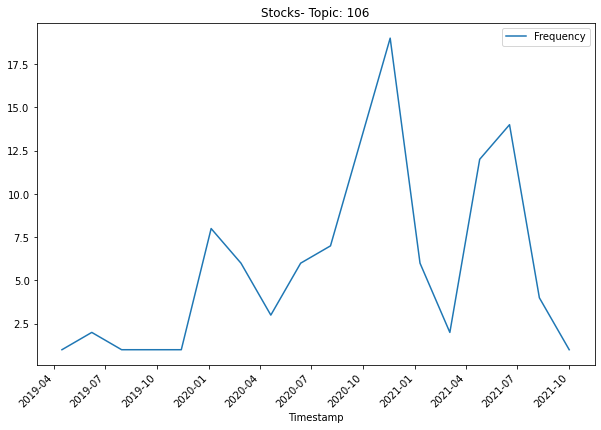

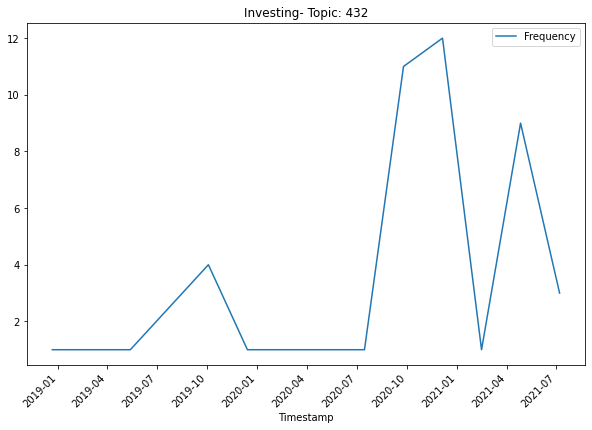

In [9]:
#2367 _ 106 _ 432 _ {'richard', 'galactic', 'branson', 'flight', 'virgin'}
plot_temporal_topic(wsb_topics_overtime,2367,"WSB")
plot_temporal_topic(stocks_topics_overtime,106,"Stocks")
plot_temporal_topic(investing_topics_overtime,432,"Investing")

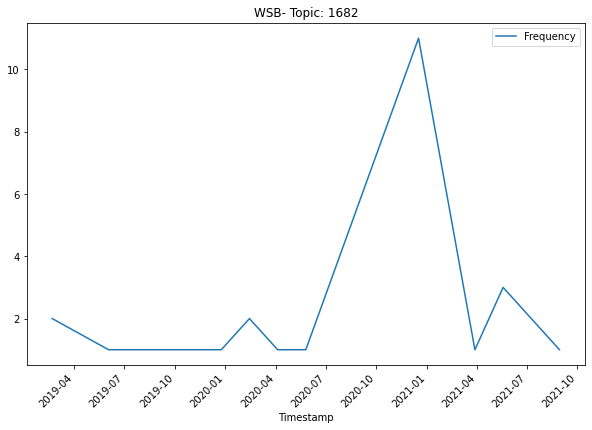

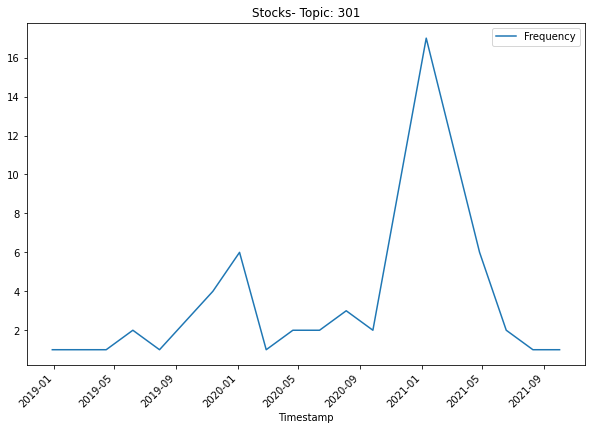

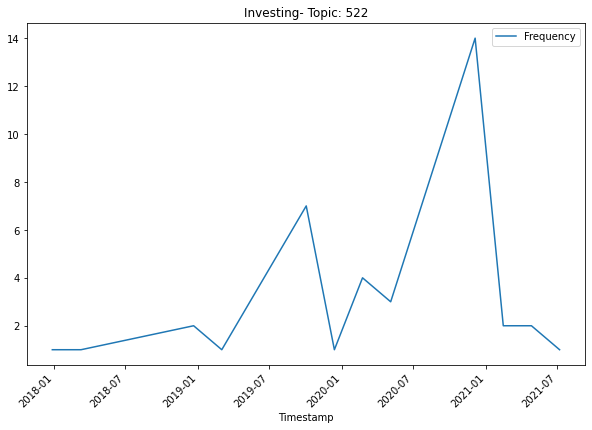

In [10]:
#1682 _ 301 _ 522 _ {'stepping', 'ceo', 'jassy', 'jeff', 'bezos'}
plot_temporal_topic(wsb_topics_overtime,1682,"WSB")
plot_temporal_topic(stocks_topics_overtime,301,"Stocks")
plot_temporal_topic(investing_topics_overtime,522,"Investing")

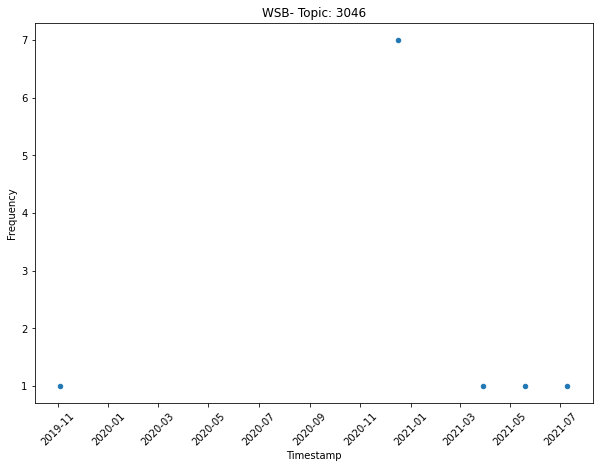

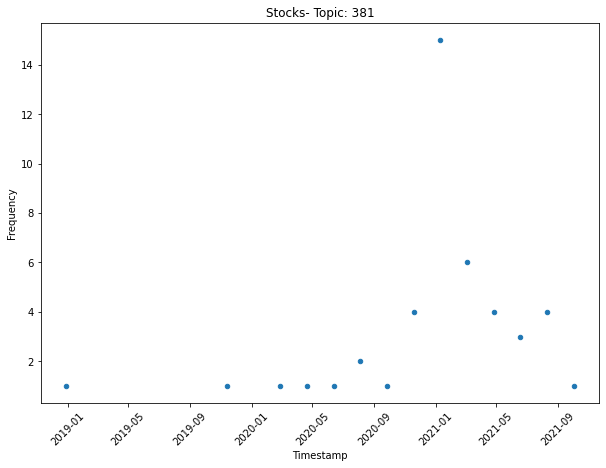

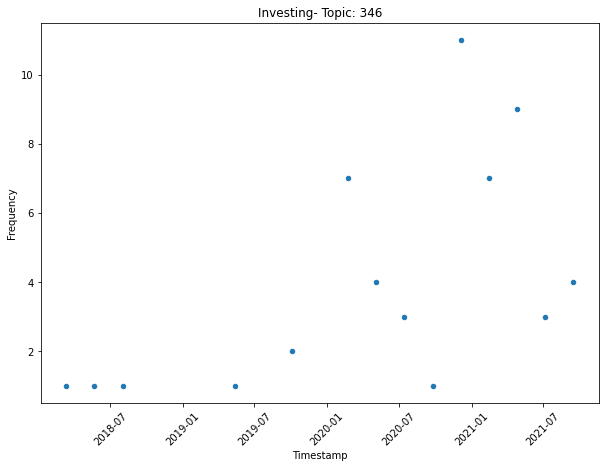

In [13]:
#3046 _ 381 _ 346 _ {'brokerages', 'transfer', 'transferring', 'brokers', 'brokerage', 'switching'}
plot_temporal_topic(wsb_topics_overtime,3046,"WSB")
plot_temporal_topic(stocks_topics_overtime,381,"Stocks")
plot_temporal_topic(investing_topics_overtime,346,"Investing")